## Проверка статистических гипотез

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from scipy import stats

In [2]:
df = pd.read_csv('AmesHousing.txt', sep='\t', index_col='Order')
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000


## Первая гипотеза

Сравним цены домов (SalePrice) в двух группах. Хотим проверить, отличаются ли цены домов в зависимости от типа улицы (тип подъезда к собственности - засыпанная гравием или вымощенная).

Зафиксируем уровень значимости 0.05 и сохраним в отдельные переменные выборки, которые будут сравниваться.

In [3]:
x = df[(df['Alley'] == 'Grvl') & (df['SalePrice'] <= 250000)]['SalePrice']
y = df[(df['Alley'] == 'Pave') & (df['SalePrice'] <= 250000)]['SalePrice']
x.name, y.name = 'Gravel', 'Pave'

In [4]:
print('Количество значений в x:', x.count())
print('Количество значений в y:', y.count())

Количество значений в x: 119
Количество значений в y: 73


### Проверка нормальности распределений

In [5]:
def two_histograms(x, y):
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

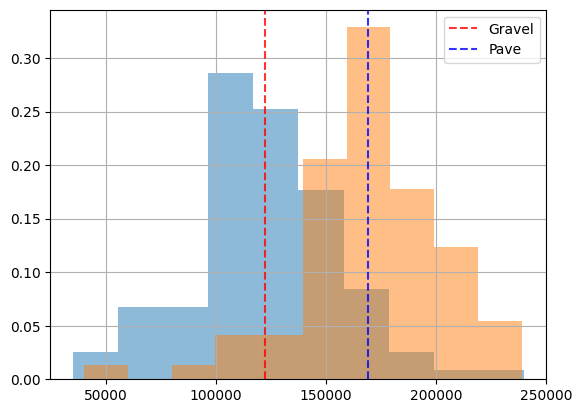

In [6]:
two_histograms(x, y)

In [13]:
res2 = stats.shapiro(x)
print('Для переменной x p-value:', res2[1])

res3 = stats.shapiro(y)
print('Для переменной y p-value:', res3[1])

Для переменной x p-value: 0.24599383771419525
Для переменной y p-value: 0.006859978195279837


In [11]:
res = stats.fligner(x, y)
print('p-value:', res[1])

p-value: 0.6066264620378254


In [12]:
res = stats.ttest_ind(x, y, equal_var=True)
print('p-value:', res[1])

p-value: 1.149349919969559e-17


Значение p-value меньше уровня значимости 0.05, поэтому гипотезу отвергаем.

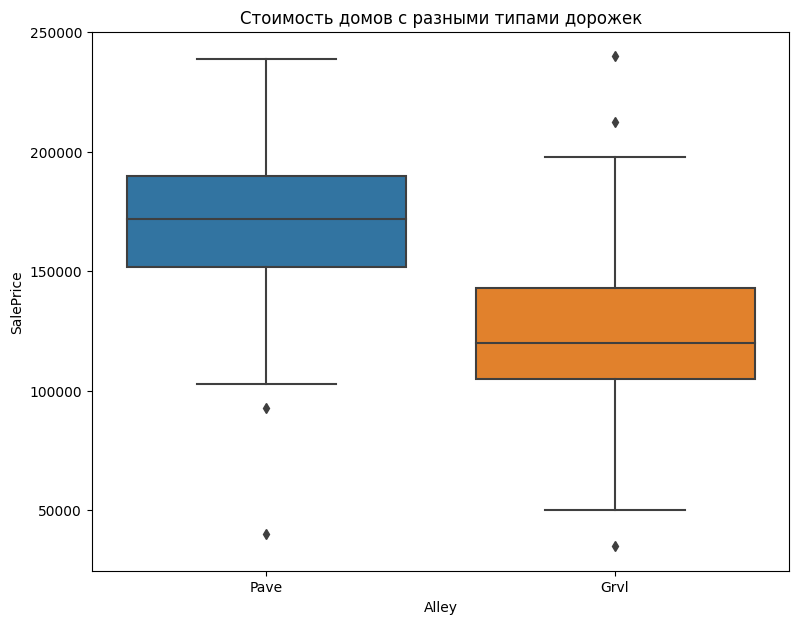

In [10]:
plt.figure(figsize=(9,7))
sns.boxplot(x ='Alley', y ='SalePrice', data = df[((df['Alley'] == 'Grvl') | (df['Alley'] == 'Pave'))\
                                                  & (df['SalePrice'] <= 250000)]).set_title('Стоимость домов с разными типами дорожек');

## Вторая гипотеза

Отличаются ли цены домов в зависимости от типа участка

In [15]:
x = df[(df['Lot Shape'] == 'Reg')]['SalePrice']
y = df[(df['Lot Shape'] != 'Reg')]['SalePrice']
x.name, y.name = 'Regular', 'Irregular'

In [16]:
print('Количество значений в x:', x.count())
print('Количество значений в y:', y.count())

Количество значений в x: 1859
Количество значений в y: 1071


### Проверка нормальности распределений

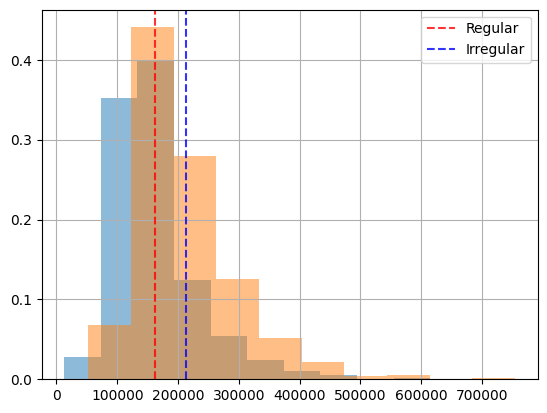

In [17]:
two_histograms(x, y)

In [18]:
res2 = stats.shapiro(x)
print('Для переменной x p-value:', res2[1])

res3 = stats.shapiro(y)
print('Для переменной y p-value:', res3[1])

Для переменной x p-value: 6.186580819240535e-38
Для переменной y p-value: 1.826503425822256e-27


In [19]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 6.399176768177033e-81


Гипотезу отвергаем.

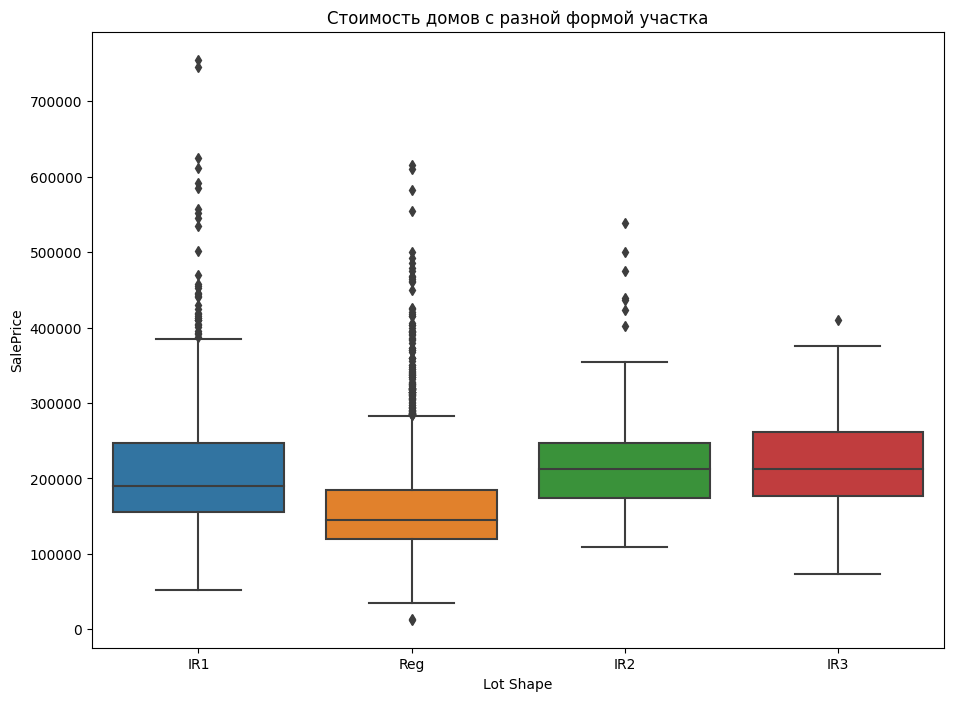

In [20]:
plt.figure(figsize=(11,8))
sns.boxplot(x ='Lot Shape', y ='SalePrice', data = df).set_title('Стоимость домов с разной формой участка');